Best Chromosome: [182, 591, 114]
Best Chromosome Fitness Score: 106584.1896334
[(23.2890516084, 77.2729422692), (23.2831064, 77.2766175), (23.2916073113, 77.2739662601)]


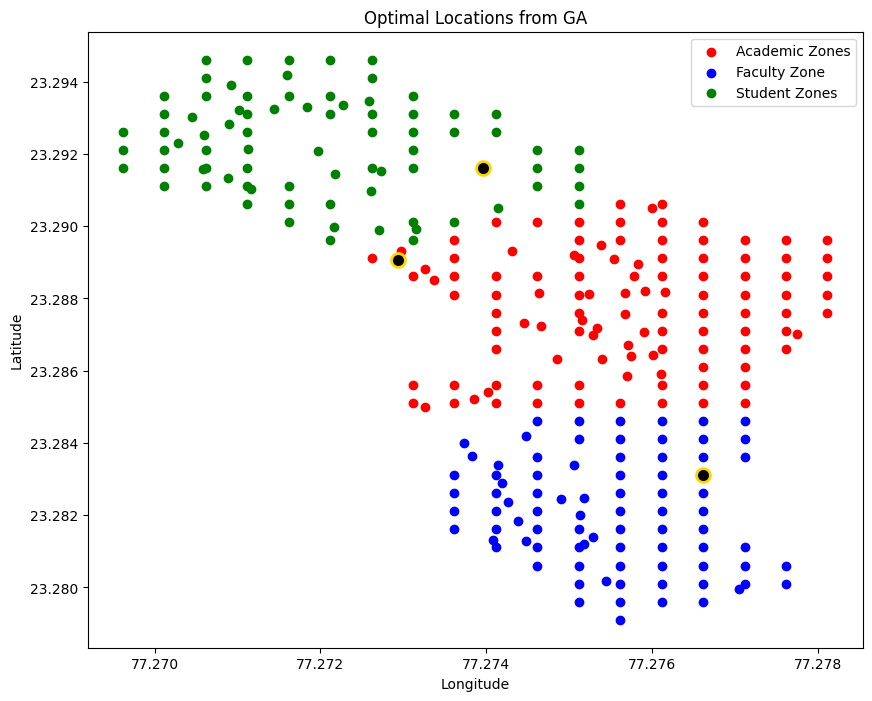

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


academic_zones_df = pd.read_csv('academic.csv')
faculty_zone_df = pd.read_csv('faculty.csv')
student_zones_df = pd.read_csv('student.csv')
academic_dist = pd.read_csv('academic_dist.csv')
faculty_dist = pd.read_csv('faculty_dist.csv')
student_dist = pd.read_csv('student_dist.csv')

distance_matrices = {
    'academic': academic_dist,
    'faculty': faculty_dist,
    'student': student_dist
}


def generate_chromosome(academic_df, faculty_df, student_df):
    academic_gene = academic_df.sample(1)['proj_id'].values[0]
    faculty_gene = faculty_df.sample(1)['proj_id'].values[0]
    student_gene = student_df.sample(1)['proj_id'].values[0]
    return [academic_gene, faculty_gene, student_gene]


def calculate_cost_sum(proj_id, dist_matrix):
    total_cost_sum = dist_matrix.loc[dist_matrix['origin_id'] == proj_id, 'total_cost'].sum()
    return total_cost_sum


def fitness_function(chromosome, distance_matrices):
    cost = 0
    zones = ['academic', 'faculty', 'student']
    for i, gene in enumerate(chromosome):
        cost += calculate_cost_sum(gene, distance_matrices[zones[i]])
    return cost


def crossover(chromosome1, chromosome2):
    return [chromosome1[0]] + chromosome2[1:], [chromosome2[0]] + chromosome1[1:]


def mutate(chromosome, zone_dfs, gene_to_mutate):
    zone_df = zone_dfs[gene_to_mutate]
    new_gene = zone_df.sample(1)['proj_id'].values[0]
    chromosome[gene_to_mutate] = new_gene
    return chromosome


num_chromosomes = 10
chromosomes = [generate_chromosome(academic_zones_df, faculty_zone_df, student_zones_df) for _ in range(num_chromosomes)]


fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in chromosomes]


sorted_chromosomes = [chromosome for _, chromosome in sorted(zip(fitness_scores, chromosomes), key=lambda pair: pair[0])]


new_generation = []
zone_dfs = [academic_zones_df, faculty_zone_df, student_zones_df]
for i in range(len(sorted_chromosomes) - 1):
    offspring1, offspring2 = crossover(sorted_chromosomes[i], sorted_chromosomes[i+1])

    gene_to_mutate = random.randint(0, 2)
    offspring1 = mutate(offspring1, zone_dfs, gene_to_mutate)
    offspring2 = mutate(offspring2, zone_dfs, gene_to_mutate)
    new_generation.extend([offspring1, offspring2])


new_fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in new_generation]
best_chromosome_index = np.argmin(new_fitness_scores)
best_chromosome = new_generation[best_chromosome_index]


print("Best Chromosome:", best_chromosome)
print("Best Chromosome Fitness Score:", new_fitness_scores[best_chromosome_index])


def get_coordinates_from_chromosome(chromosome, academic_df, faculty_df, student_df):
    coordinates = []
    for gene_id, df in zip(chromosome, [academic_df, faculty_df, student_df]):
        row = df[df['proj_id'] == gene_id]
        if not row.empty:
            coordinates.append((row['y'].values[0], row['x'].values[0]))
        else:
            coordinates.append((np.nan, np.nan))
    return coordinates

best_chromosome_coordinates = get_coordinates_from_chromosome(best_chromosome, academic_zones_df, faculty_zone_df, student_zones_df)
print(best_chromosome_coordinates)


plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')
best_coords = get_coordinates_from_chromosome(best_chromosome, academic_zones_df, faculty_zone_df, student_zones_df)
for coord in best_coords:
    plt.scatter(coord[1], coord[0], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Locations from GA')
plt.show()

Best Chromosome: [542, 514, 216]
Best Chromosome Fitness Score: 113755.6356035
[(23.2876064, 77.2761175), (23.2816064, 77.2756175), (23.2906064, 77.2721175)]


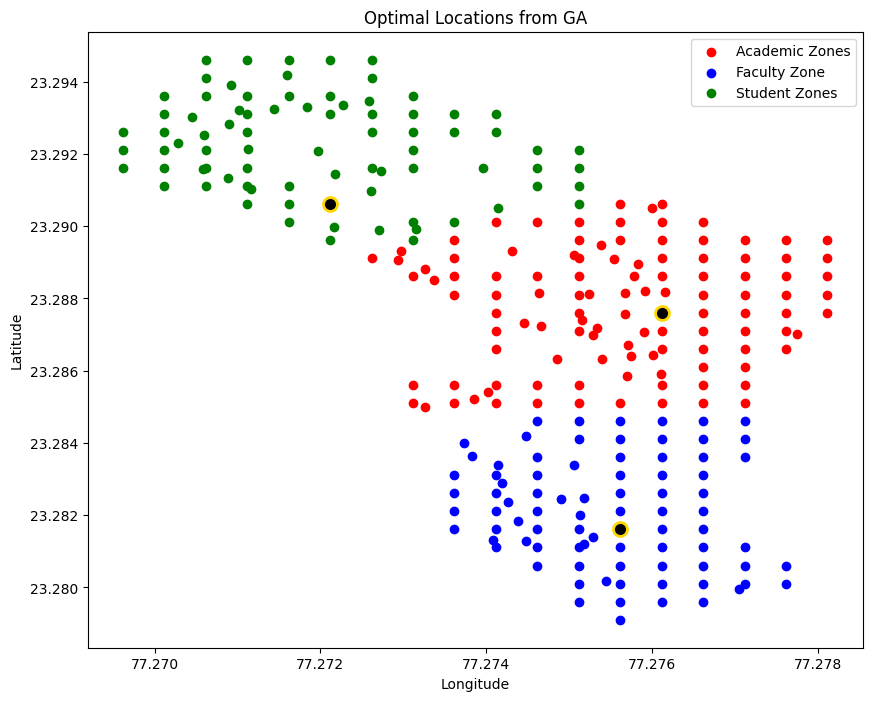

In [ ]:
#seed value has been defined to maintain the reproducibility of our results (seed value = 42)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

seed_value = 42

random.seed(seed_value)


academic_zones_df = pd.read_csv('academic.csv')
faculty_zone_df = pd.read_csv('faculty.csv')
student_zones_df = pd.read_csv('student.csv')
academic_dist = pd.read_csv('academic_dist.csv')
faculty_dist = pd.read_csv('faculty_dist.csv')
student_dist = pd.read_csv('student_dist.csv')

distance_matrices = {
    'academic': academic_dist,
    'faculty': faculty_dist,
    'student': student_dist
}


def generate_chromosome(academic_df, faculty_df, student_df):
    academic_gene = academic_df.sample(n=1,random_state=seed_value)['proj_id'].values[0]
    faculty_gene = faculty_df.sample(n=1,random_state=seed_value)['proj_id'].values[0]
    student_gene = student_df.sample(n=1,random_state=seed_value)['proj_id'].values[0]
    return [academic_gene, faculty_gene, student_gene]


def calculate_cost_sum(proj_id, dist_matrix):
    total_cost_sum = dist_matrix.loc[dist_matrix['origin_id'] == proj_id, 'total_cost'].sum()
    return total_cost_sum


def fitness_function(chromosome, distance_matrices):
    cost = 0
    zones = ['academic', 'faculty', 'student']
    for i, gene in enumerate(chromosome):
        cost += calculate_cost_sum(gene, distance_matrices[zones[i]])
    return cost


def crossover(chromosome1, chromosome2):
    return [chromosome1[0]] + chromosome2[1:], [chromosome2[0]] + chromosome1[1:]


def mutate(chromosome, zone_dfs, gene_to_mutate):
    zone_df = zone_dfs[gene_to_mutate]
    num_rows = len(zone_df)
    new_gene = zone_df.sample(n=1, random_state=seed_value).iloc[0]['proj_id']
    chromosome[gene_to_mutate] = new_gene
    return chromosome



num_chromosomes = 10

chromosomes = [generate_chromosome(academic_zones_df, faculty_zone_df, student_zones_df) for _ in range(num_chromosomes)]


fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in chromosomes]


sorted_chromosomes = [chromosome for _, chromosome in sorted(zip(fitness_scores, chromosomes), key=lambda pair: pair[0])]


new_generation = []
zone_dfs = [academic_zones_df, faculty_zone_df, student_zones_df]
for i in range(len(sorted_chromosomes) - 1):
    offspring1, offspring2 = crossover(sorted_chromosomes[i], sorted_chromosomes[i+1])
    gene_to_mutate = random.randint(0, 2)
    offspring1 = mutate(offspring1, zone_dfs, gene_to_mutate)
    offspring2 = mutate(offspring2, zone_dfs, gene_to_mutate)
    new_generation.extend([offspring1, offspring2])


new_fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in new_generation]
best_chromosome_index = np.argmin(new_fitness_scores)
best_chromosome = new_generation[best_chromosome_index]


print("Best Chromosome:", best_chromosome)
print("Best Chromosome Fitness Score:", new_fitness_scores[best_chromosome_index])


def get_coordinates_from_chromosome(chromosome, academic_df, faculty_df, student_df):
    coordinates = []
    for gene_id, df in zip(chromosome, [academic_df, faculty_df, student_df]):
        row = df[df['proj_id'] == gene_id]
        if not row.empty:
            coordinates.append((row['y'].values[0], row['x'].values[0]))
        else:
            coordinates.append((np.nan, np.nan))
    return coordinates

best_chromosome_coordinates = get_coordinates_from_chromosome(best_chromosome, academic_zones_df, faculty_zone_df, student_zones_df)
print(best_chromosome_coordinates)


plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')
best_coords = get_coordinates_from_chromosome(best_chromosome, academic_zones_df, faculty_zone_df, student_zones_df)
for coord in best_coords:
    plt.scatter(coord[1], coord[0], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Locations from GA')
plt.show()

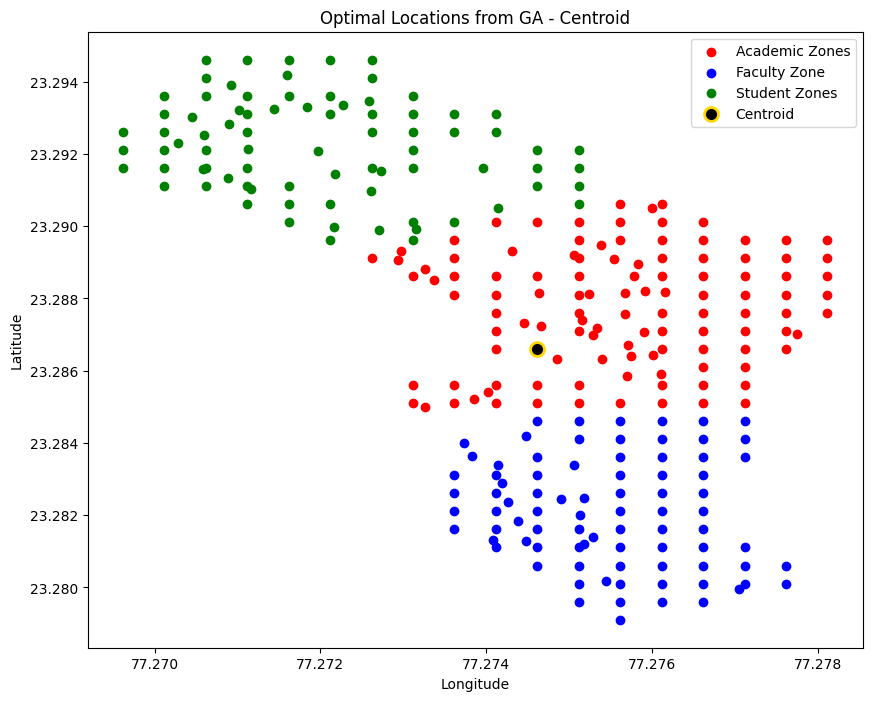

In [ ]:
import numpy as np
from scipy.spatial import Delaunay


coordinates = np.array(best_chromosome_coordinates)


tri = Delaunay(coordinates)


centroid = np.mean(coordinates[tri.simplices], axis=1)

plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')
plt.scatter(centroid[:, 1], centroid[:, 0], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5, label='Centroid')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Locations from GA - Centroid')
plt.show()


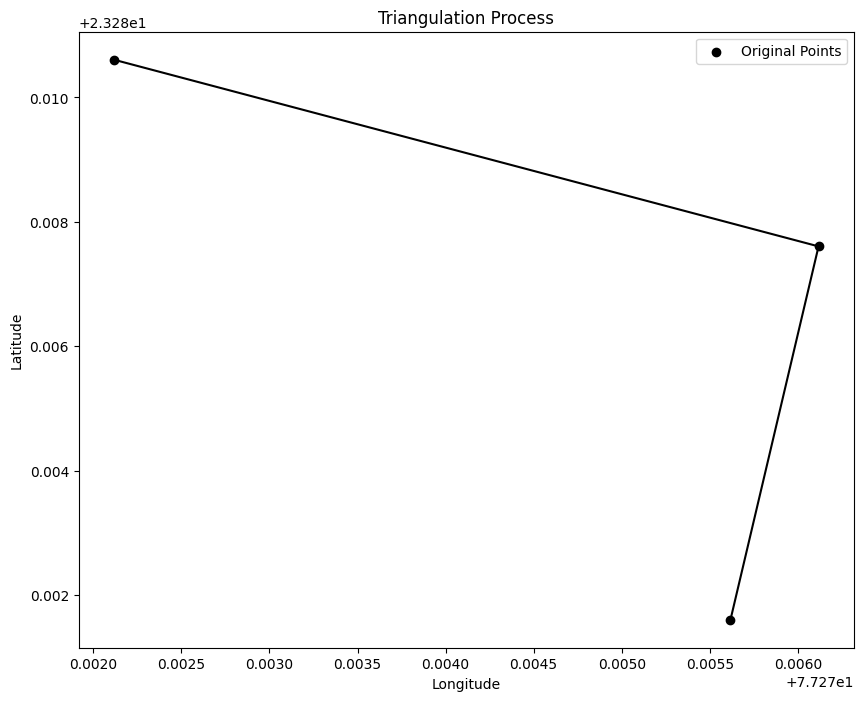

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


coordinates = np.array(best_chromosome_coordinates)


plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='black', label='Original Points')

tri = Delaunay(coordinates)


for simplex in tri.simplices:
    plt.plot(coordinates[simplex, 1], coordinates[simplex, 0], 'k-')


for simplex in tri.simplices:
    xc = np.mean(coordinates[simplex, 1])
    yc = np.mean(coordinates[simplex, 0])
    r = np.max(np.linalg.norm(coordinates[simplex, :] - [xc, yc], axis=1))
    circle = plt.Circle((xc, yc), r, color='b', fill=False)
    plt.gca().add_artist(circle)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulation Process')
plt.legend()
plt.show()


Optimal Location : [[23.2866064 77.2746175]]


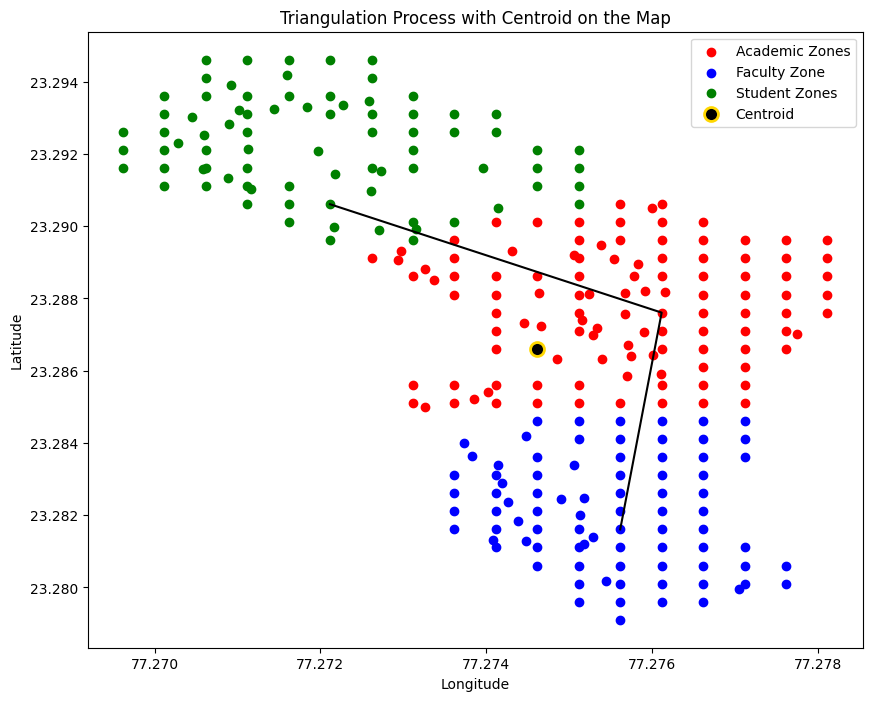

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


coordinates = np.array(best_chromosome_coordinates)


plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')


tri = Delaunay(coordinates)


for simplex in tri.simplices:
    plt.plot(coordinates[simplex, 1], coordinates[simplex, 0], 'k-')


centroid = np.mean(coordinates[tri.simplices], axis=1)
print('Optimal Location :',centroid)


plt.scatter(centroid[:, 1], centroid[:, 0], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5, label='Centroid')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulation Process with Centroid on the Map')
plt.legend()
plt.show()


In [ ]:
import folium


map_center = [np.mean(academic_zones_df['y']), np.mean(academic_zones_df['x'])]
mymap = folium.Map(location=map_center, zoom_start=12)


for index, row in academic_zones_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='red')).add_to(mymap)


for index, row in faculty_zone_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='blue')).add_to(mymap)


for index, row in student_zones_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='green')).add_to(mymap)


centroid_location = [np.mean(centroid[:, 0]), np.mean(centroid[:, 1])]
folium.Marker(centroid_location, popup='Optimum Location (Centroid)', icon=folium.Icon(color='black')).add_to(mymap)


legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 165px; height: 165px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; Academic Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Faculty Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; Student Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; Optimum Location &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i>
      </div>
     '''
mymap.get_root().html.add_child(folium.Element(legend_html))


mymap.save("locations_map_with_legend.html")